In [1]:
!pip install apache_beam mwparserfromhell
!pip install transformers
!pip install datasets
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

# multilingual CLIP pretrained
# https://github.com/FreddeFrallan/Multilingual-CLIP
!pip install multilingual-clip
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.5/515.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 99.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for crcmod: filename=crcmod-1.7-cp39-cp39-linux_x86_64.whl size=36912 sha256=65724bacdb69b1ca7d12b0fddf9c898b17b8b30a7

In [2]:
import os
import sys

repo = 'zeroshot-unsupervised-mt'
if os.path.isdir('zeroshot-unsupervised-mt'):
  !rm -rf {repo}

!git clone https://github.com/pinnouse/zeroshot-unsupervised-mt.git

if not repo in sys.path:
  sys.path.insert(1, repo)

Cloning into 'zeroshot-unsupervised-mt'...
remote: Enumerating objects: 288, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 288 (delta 102), reused 127 (delta 80), pack-reused 129
Receiving objects: 100% (288/288), 379.87 KiB | 10.00 MiB/s, done.
Resolving deltas: 100% (177/177), done.


In [3]:
%cd /content/zeroshot-unsupervised-mt/
!git pull

/content/zeroshot-unsupervised-mt
Already up to date.


In [4]:
from data_loader import data_loader

from google.colab import drive
import pickle
drive.mount('/content/gdrive')

with open('/content/gdrive/My Drive/CSC413/Project/en_reparsed.pickle', 'rb') as f:
  ds_en = pickle.load(f)


Mounted at /content/gdrive


In [5]:
ds_fr = data_loader("fr")
ds_frr = data_loader("frr")
ds_ar = data_loader("ar")
ds_jp = data_loader("jp")

Downloading:   0%|          | 0.00/4.33k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/7.38G [00:00<?, ?B/s]

Dataset wikipedia downloaded and prepared to /root/.cache/huggingface/datasets/wikipedia/20220301.fr/2.0.0/aa542ed919df55cc5d3347f42dd4521d05ca68751f50dbc32bae2a7f1e167559. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.13M [00:00<?, ?B/s]

Dataset wikipedia downloaded and prepared to /root/.cache/huggingface/datasets/wikipedia/20220301.frr/2.0.0/aa542ed919df55cc5d3347f42dd4521d05ca68751f50dbc32bae2a7f1e167559. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/4207 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/469 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/SaiedAlshahrani___parquet/SaiedAlshahrani--Moroccan_Arabic_Wikipedia_20230101-65e7a7ddf17906d4/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset text downloaded and prepared to /root/.cache/huggingface/datasets/AhmedSSabir___text/AhmedSSabir--Japanese-wiki-dump-sentence-dataset-063b8dbed854cd7c/0.0.0/cb1e9bd71a82ad27976be3b12b407850fe2837d80c22c5e03a28949843a8ace2. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
print(len(ds_en['train']['sentences']))

7029


Training

In [13]:
# Insert training code here
import torch
from training import train_decoder, train_transformer, train_discriminator, train_translator, train
from models import Decoder, Transformer, Translator, Discriminator

from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

device = "cuda" if torch.cuda.is_available() else "cpu"
decoder_checkpoint = torch.load('/content/gdrive/My Drive/CSC413/Project/ckpt-Decoder-epoch-49.pt', map_location=torch.device(device))
ckpt_path = '/content/gdrive/My Drive/CSC413/Project'
checkpoint = torch.load('/content/gdrive/My Drive/CSC413/Project/ckpt-epoch-40.pt', map_location=torch.device(device))


transformer = Transformer(tokenizer.vocab_size, d_hid=512, nlayers=3)
real_decoder = Decoder(tokenizer.vocab_size, d_hid=512, nlayers=3)
translate = Translator(hidden=512)
discriminator = Discriminator()

real_decoder.to(device)
transformer.to(device)
translate.to(device)
discriminator.to(device) 

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=512, out_features=100, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=100, out_features=1, bias=True)
  )
)

Epoch 41:
Iteration 100 of 218
Iteration 200 of 218
	train loss (decoder)   : 0.0
	train loss (generator) : 1.2911315131078072
	train loss (discrim)   : 0.6575100974205437
	train loss (translator): 0.7847330403437308
	took: 166.649991 seconds
Probability Discriminator classifies English Embs:  tensor(0.5275, device='cuda:0')
Probability Discriminator classifies Other Embs as English Embs:  tensor(0.4729, device='cuda:0') 

Epoch 42:
Iteration 100 of 218
Iteration 200 of 218
	train loss (decoder)   : 0.0
	train loss (generator) : 1.2240270690633617
	train loss (discrim)   : 0.6429957028375853
	train loss (translator): 0.816327749042336
	took: 167.562791 seconds
Probability Discriminator classifies English Embs:  tensor(0.4983, device='cuda:0')
Probability Discriminator classifies Other Embs as English Embs:  tensor(0.4549, device='cuda:0') 

Epoch 43:
Iteration 100 of 218
Iteration 200 of 218
	train loss (decoder)   : 0.0
	train loss (generator) : 1.1834012354732653
	train loss (discrim

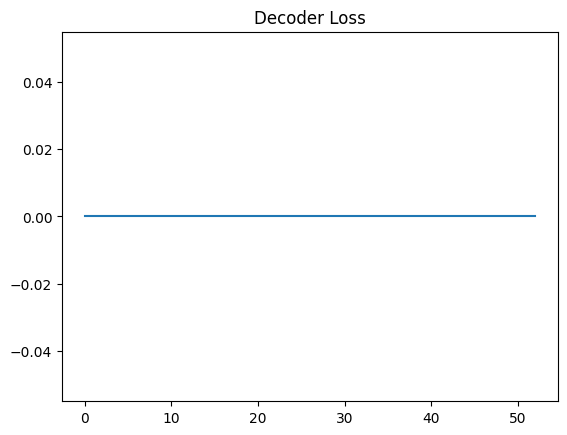

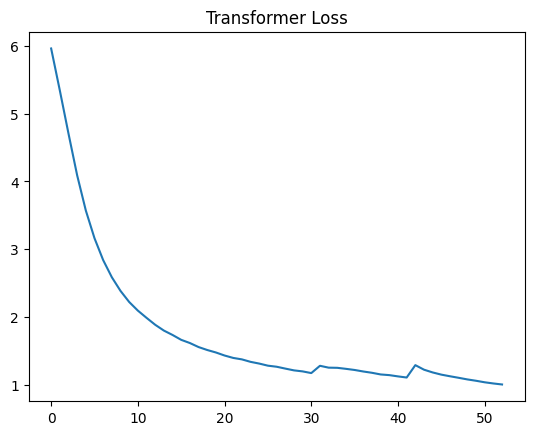

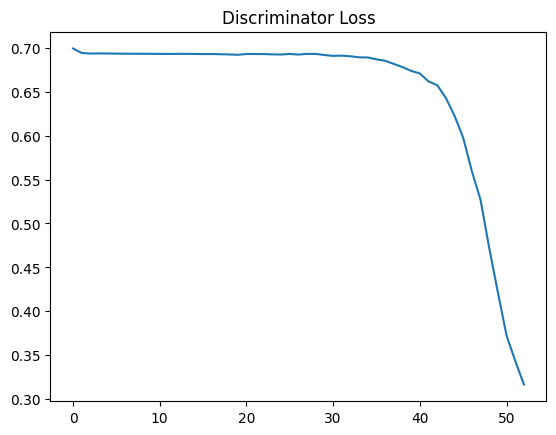

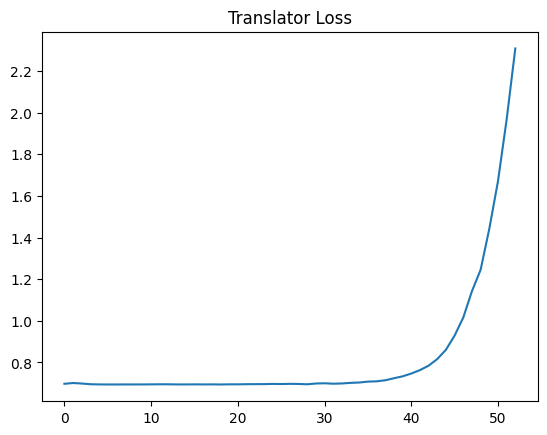

In [14]:
train(real_decoder, transformer, discriminator, translate, tokenizer, real_train=ds_en['train'], 
       other_train=ds_jp[0], real_valid=ds_en['validation'], other_valid=ds_jp[1], device=device, 
       ckpt_path=ckpt_path, batch_size=32, ckpt_interval=20, epochs=51, checkpoint=checkpoint, decoder_checkpoint=decoder_checkpoint) 

#  train(real_decoder, transformer, discriminator, translate, tokenizer=tokenizer,
#       real_train=ds_en['train'], other_train=ds_ar[0], real_valid=ds_en['validation'], other_valid=ds_ar[1],
#       device=device,
#       ckpt_path=ckpt_path, batch_size=40, ckpt_interval=5, epochs=50, decoder_checkpoint=decoder_checkpoint)